# Exploratory Data Analysis

In [1]:
# Import necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Create pd dataframes from csv files
df = pd.read_csv('../DATA/data.csv')

## EDA
***

In [3]:
def basic_plots(data):
    # Create hist plot
    data.hist(figsize=(13,13))
    plt.show()
    
    # Create heatmap
    plt.figure(figsize=(15,8))
    sns.set(style="darkgrid")
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.xticks(rotation = 60)

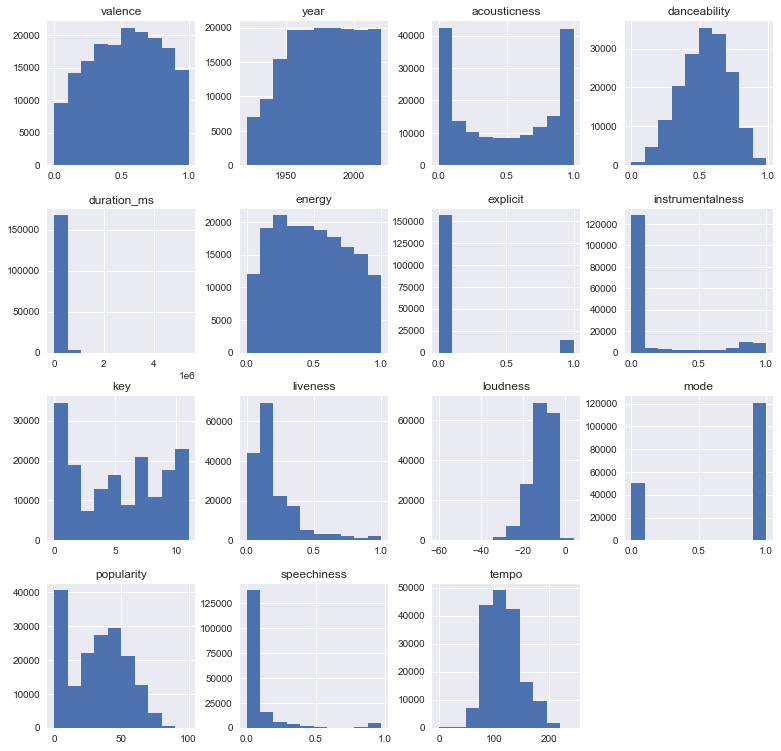

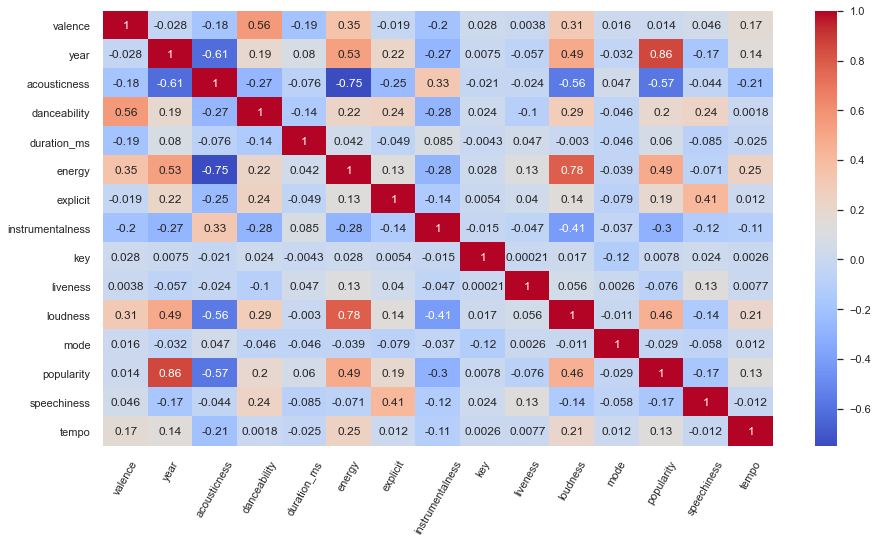

In [4]:
basic_plots(df)

Popularity and year are highly correlated

### Top 10 most popular tracks

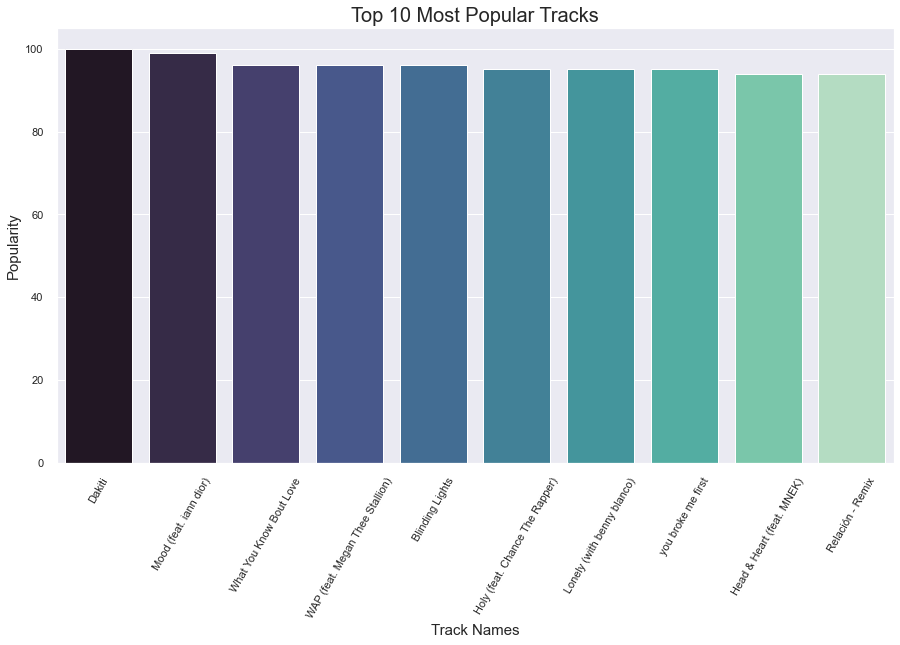

In [5]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")

pop = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(pop.index, pop, palette=("mako"))

ax.set_title('Top 10 Most Popular Tracks', fontsize=20)
ax.set_ylabel('Popularity', fontsize=15)
ax.set_xlabel('Track Names', fontsize=15)

plt.xticks(rotation = 60)
plt.show()

### Top 20 most popular artists

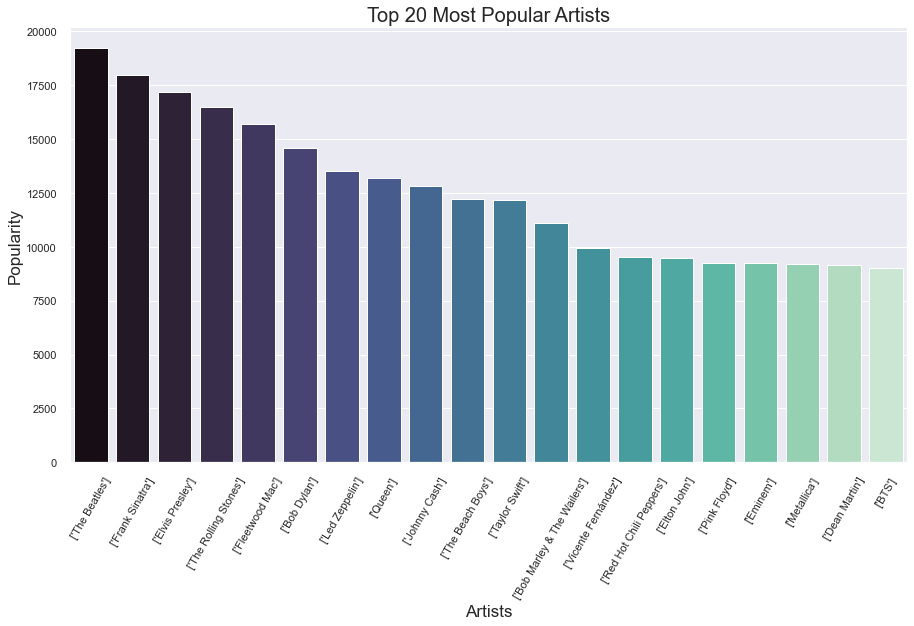

In [6]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")

popart = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(popart.index, popart, palette=("mako"))

ax.set_title('Top 20 Most Popular Artists', fontsize=20)
ax.set_ylabel('Popularity', fontsize=17)
ax.set_xlabel('Artists', fontsize=17)

plt.xticks(rotation = 60)
plt.show()

### Time Series

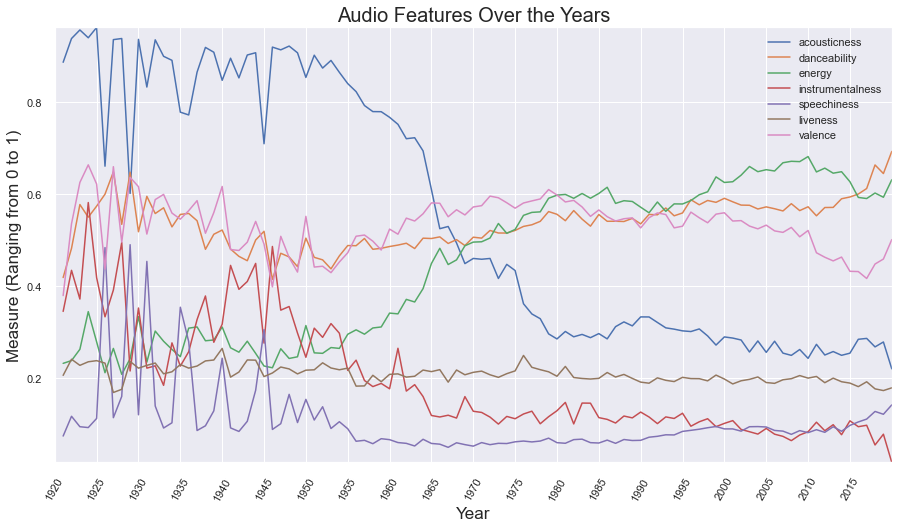

In [7]:
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid") 
columns = ["acousticness","danceability","energy","instrumentalness","speechiness","liveness","valence"]

for col in columns:
    x = df.groupby("year")[col].mean()
    ax = sns.lineplot(x=x.index,y=x,label=col, palette=("Dark2"))
    
ax.set_title('Audio Features Over the Years', fontsize=20)
ax.set_ylabel('Measure (Ranging from 0 to 1)', fontsize=17)
ax.set_xlabel('Year', fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

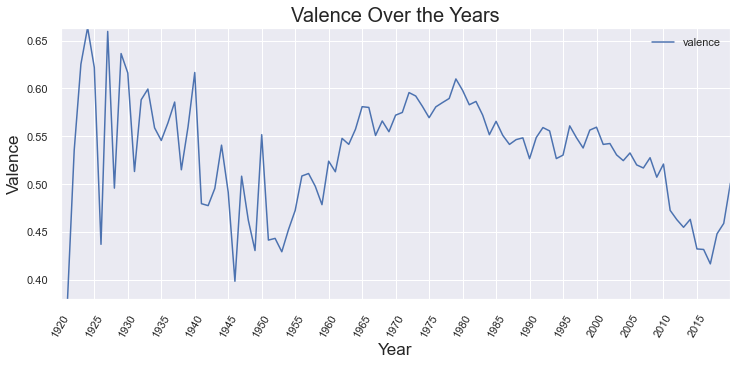

In [8]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Valence Over the Years', fontsize=20)
ax.set_ylabel('Valence', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

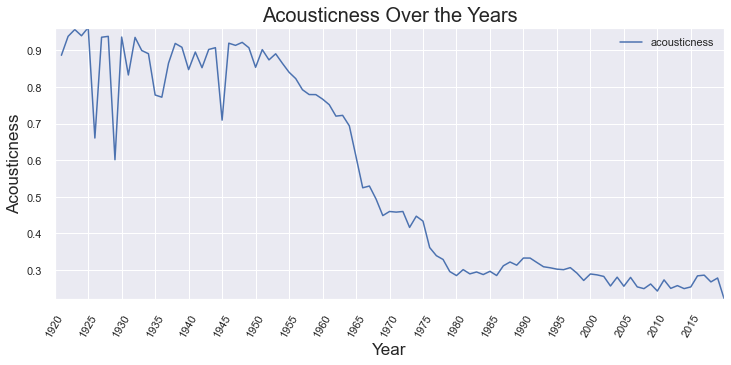

In [9]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["acousticness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Acousticness Over the Years', fontsize=20)
ax.set_ylabel('Acousticness', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

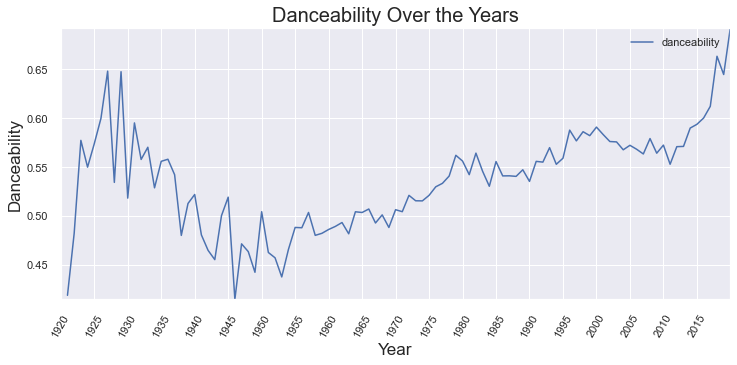

In [10]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["danceability"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Danceability Over the Years', fontsize=20)
ax.set_ylabel('Danceability', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

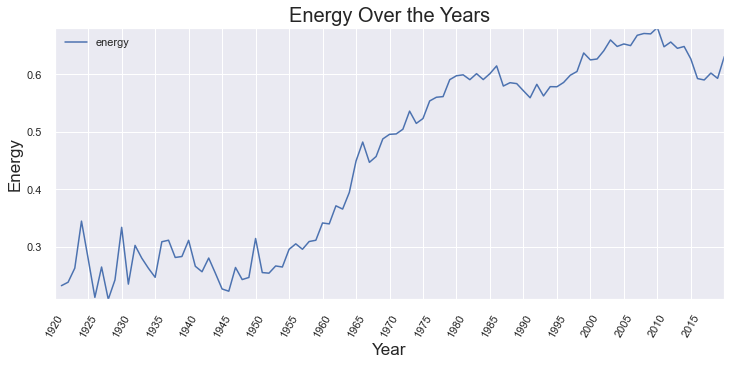

In [11]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["energy"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Energy Over the Years', fontsize=20)
ax.set_ylabel('Energy', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

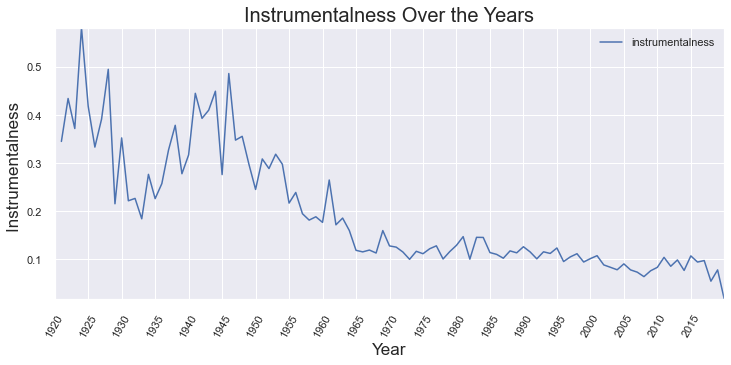

In [12]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["instrumentalness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Instrumentalness Over the Years', fontsize=20)
ax.set_ylabel('Instrumentalness ', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

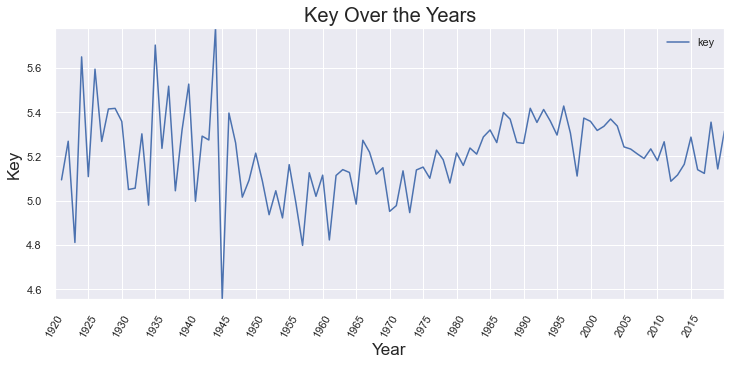

In [13]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["key"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Key Over the Years', fontsize=20)
ax.set_ylabel('Key', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

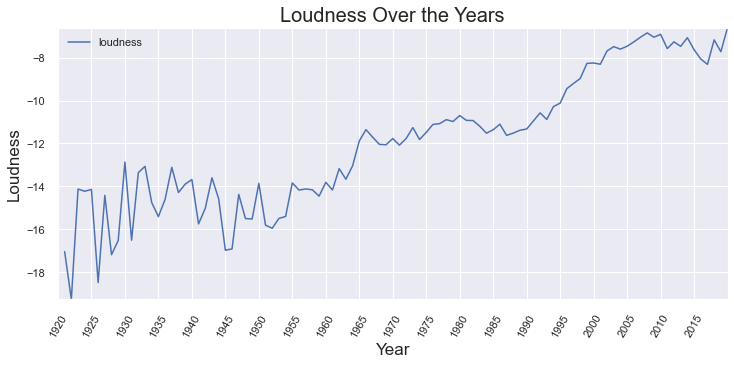

In [14]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["loudness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Loudness Over the Years', fontsize=20)
ax.set_ylabel('Loudness', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

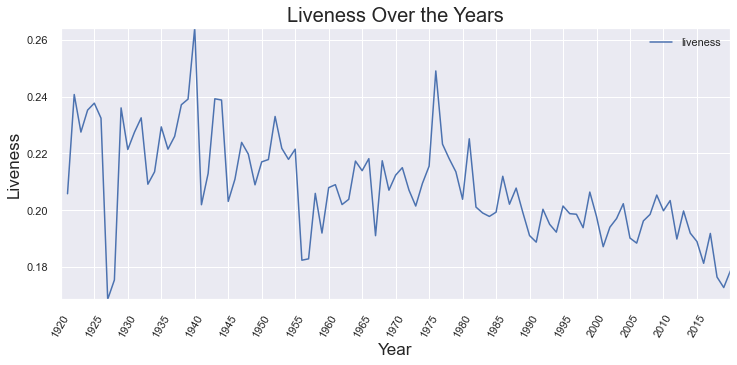

In [15]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["liveness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Liveness Over the Years', fontsize=20)
ax.set_ylabel('Liveness', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

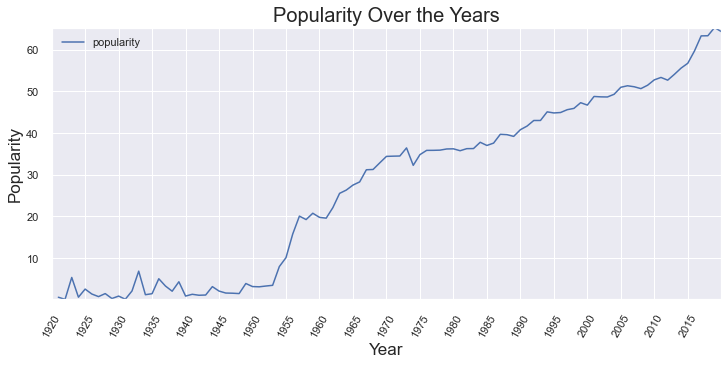

In [16]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["popularity"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Popularity Over the Years', fontsize=20)
ax.set_ylabel('Popularity', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

So songs don't really start getting popular until the early 1950s. When you think about it that makes sense. Many people using spotify are not really gonna be listening to music from the 1920s - late 1940s. Should investigate this more..

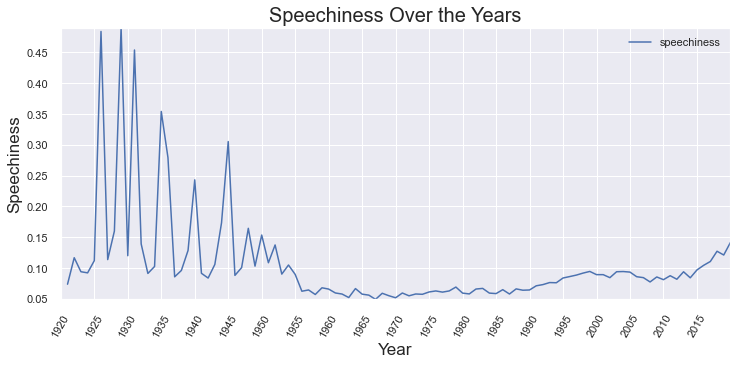

In [17]:
plt.figure(figsize=(12, 5))
sns.set(style="darkgrid")

columns = ["speechiness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)

ax.set_title('Speechiness Over the Years', fontsize=20)
ax.set_ylabel('Speechiness', fontsize=17)
ax.set_xlabel('Year',  fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.xticks(np.arange(1920, 2020, 5))
plt.show()

### Reg plots

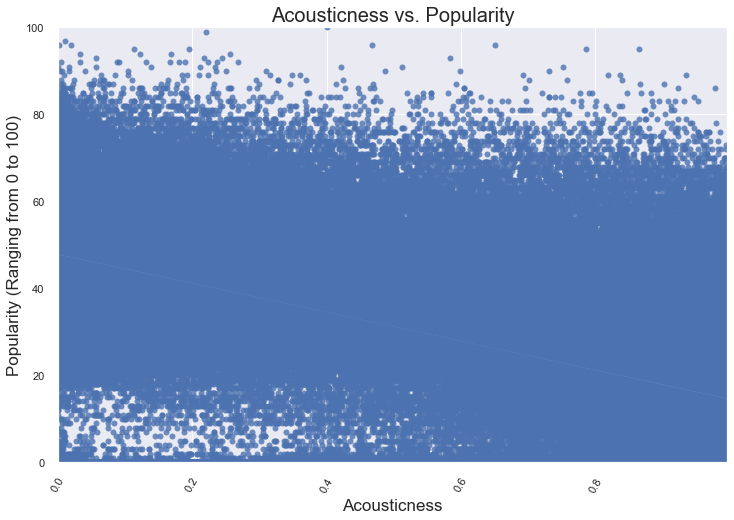

In [18]:
plt.figure(figsize=(12, 8))
sns.regplot(x=df['acousticness'], y="popularity", data=df)

plt.title('Acousticness vs. Popularity', fontsize=20)
plt.ylabel('Popularity (Ranging from 0 to 100)', fontsize=17)
plt.xlabel('Acousticness', fontsize=17)

plt.xticks(rotation = 60)
plt.autoscale(tight=True)
plt.show();